In [32]:

import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D,MaxPool2D
from keras import backend as k

In [33]:
batch_size=128
num_classes=10
epochs=12

In [34]:
img_rows,img_cols=28,28


In [35]:
from keras.datasets import mnist

(xtrain,ytrain),(xtest,ytest)=mnist.load_data()

In [36]:
print('Training set images shape: {}'.format(xtrain.shape))
print('Training set labels shape: {}'.format(ytrain.shape))
print('Test set images shape: {}'.format(xtest.shape))
print('Test set labels shape: {}'.format(ytest.shape))

Training set images shape: (60000, 28, 28)
Training set labels shape: (60000,)
Test set images shape: (10000, 28, 28)
Test set labels shape: (10000,)


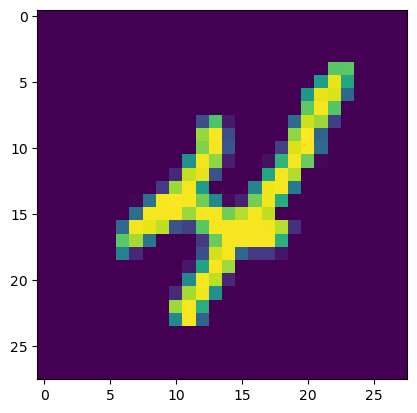

In [38]:
import matplotlib.pyplot as plt
plt.imshow(xtrain[9])


In [27]:
xtrain[0].shape


(28, 28, 1)

In [8]:
xtrain=xtrain.reshape(xtrain.shape[0],img_rows,img_cols,1)
xtest=xtest.reshape(xtest.shape[0],img_rows,img_cols,1)
print(xtrain.shape)
print(xtest.shape)



(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [9]:
xtrain=xtrain.astype('float32')
xtest=xtest.astype('float32')

In [10]:
xtrain/=255
xtest/=255

In [11]:
print('xtrain shape:',xtrain.shape)
print(xtrain.shape[0],'train samples')
print(xtest.shape[0],'test samples')

xtrain shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [42]:
ytrain_one_hot = to_categorical(ytrain, num_classes=10)
ytest_one_hot = to_categorical(ytest, num_classes=10)


In [43]:
ytrain[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

# Creating CNN model


In [44]:
model=Sequential()
#add model layers
model.add(Conv2D(64,kernel_size=3,activation='relu',input_shape=(28,28,1)))
model.add(Dropout(0.2))

model.add(Conv2D(32,kernel_size=3,activation='relu'))

model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
#output layer
model.add(Dense(10,activation='softmax'))

In [45]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 dropout_2 (Dropout)         (None, 26, 26, 64)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 24, 24, 32)        18464     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 12, 12, 32)        0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 4608)              0         
                                                                 
 dense_2 (Dense)             (None, 10)                46090     
                                                      

In [46]:


model.compile(optimizer=keras.optimizers.Adam(),loss=keras.losses.categorical_crossentropy,
              metrics=['accuracy'] )

In [47]:
result=model.fit(xtrain,ytrain,batch_size=batch_size,epochs=5,verbose=1,
                 validation_data=(xtest,ytest))


Epoch 1/5
469/469 [==============================] - ETA: 0s - loss: 0.2551 - accuracy: 0.9243

ValueError: in user code:

    File "C:\Users\my pc\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 2042, in test_function  *
        return step_function(self, iterator)
    File "C:\Users\my pc\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 2025, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\my pc\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 2013, in run_step  **
        outputs = model.test_step(data)
    File "C:\Users\my pc\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1895, in test_step
        self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\my pc\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1185, in compute_loss
        return self.compiled_loss(
    File "C:\Users\my pc\anaconda3\Lib\site-packages\keras\src\engine\compile_utils.py", line 277, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\my pc\anaconda3\Lib\site-packages\keras\src\losses.py", line 143, in __call__
        losses = call_fn(y_true, y_pred)
    File "C:\Users\my pc\anaconda3\Lib\site-packages\keras\src\losses.py", line 270, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\my pc\anaconda3\Lib\site-packages\keras\src\losses.py", line 2221, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "C:\Users\my pc\anaconda3\Lib\site-packages\keras\src\backend.py", line 5575, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 10, 2) and (None, 10) are incompatible


In [24]:
score=model.evaluate(xtest,ytest,verbose=0)
print('Test Loss:',score[0])
print()
print('Test Accuracy:',score[1])

Test Loss: 2.2687795162200928

Test Accuracy: 0.26660001277923584


In [39]:
result.history.keys()


NameError: name 'result' is not defined

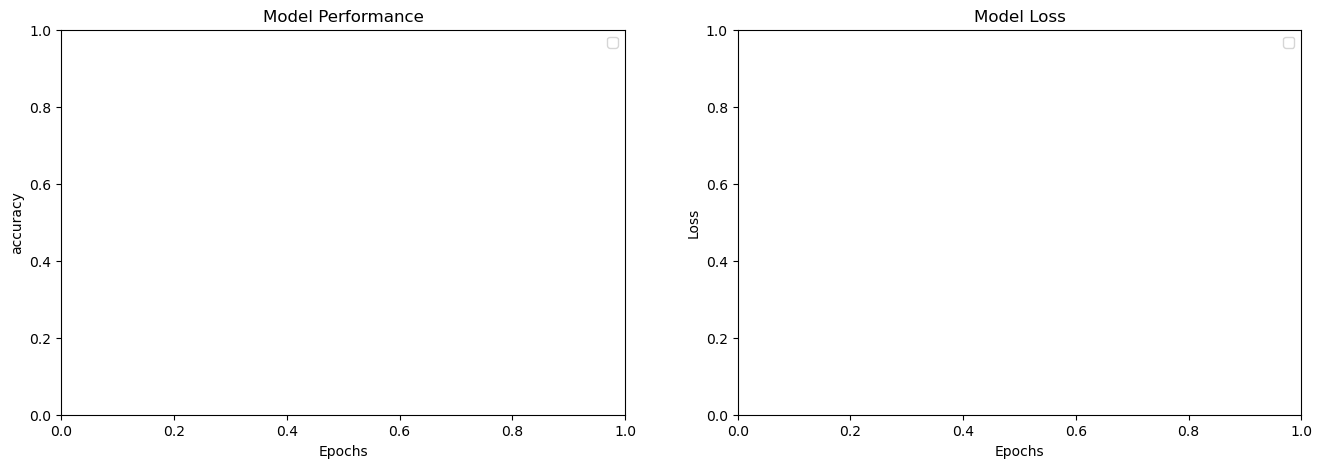

In [54]:
import matplotlib.pyplot as plt
fig,(ax1,ax2)=plt.subplots(nrows=1,ncols=2,figsize=(16,5))
#plot training & validation accuracy values
ax1.set_title('Model Performance')
ax1.set_ylabel('accuracy')
ax1.set_xlabel('Epochs')
ax1.legend(['Train','Test'])
#plot training & validation loss values
ax2.set_title('Model Loss')
ax2.set_ylabel('Loss')
ax2.set_xlabel('Epochs')
ax2.legend(['Train','Test'])


In [49]:
ypred=model.predict(xtest[:4])
ypred

1/1 [==============================] - 0s 137ms/step


array([[5.00356862e-07, 1.84915872e-09, 4.20702509e-06, 6.37386984e-06,
        1.18111854e-09, 2.01790101e-07, 2.90747743e-12, 9.99966383e-01,
        1.33184392e-06, 2.11296010e-05],
       [6.27784084e-06, 1.16741663e-04, 9.99525785e-01, 7.17658531e-06,
        2.39720310e-11, 3.50228305e-07, 3.37621692e-04, 3.04038424e-13,
        5.91196886e-06, 2.46980995e-11],
       [5.19442292e-05, 9.97320235e-01, 5.13091800e-04, 4.55583395e-05,
        8.70500517e-04, 7.60705916e-06, 7.53995046e-05, 4.41034616e-04,
        6.55902724e-04, 1.86443995e-05],
       [9.98229921e-01, 3.83770432e-10, 2.24771007e-04, 3.90187051e-06,
        5.09578058e-07, 1.02059705e-04, 1.34253060e-03, 3.12614538e-05,
        8.47444790e-06, 5.65815935e-05]], dtype=float32)

In [50]:
ytest[:4]


array([[[1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [0., 1.],
        [1., 0.],
        [1., 0.]],

       [[1., 0.],
        [1., 0.],
        [0., 1.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.]],

       [[1., 0.],
        [0., 1.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.]],

       [[0., 1.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.]]], dtype=float32)

# 2 question

In [1]:
import tensorflow
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPool2D
from keras.layers import Activation
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout

In [14]:
from keras.preprocessing.image import ImageDataGenerator

# Create an image instance of the ImageDataGenerator
train_datagen = ImageDataGenerator(rotation_range=40,
                                   width_shift_range=0.25,
                                   height_shift_range=0.25,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   rescale=1./255,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

# Train data fetching from the directory of images
batch_size = 16
train_data = train_datagen.flow_from_directory('C:\\Users\\my pc\\DL_with_python',
                                               target_size=(150, 150),
                                               batch_size=batch_size,
                                               class_mode='binary')

# Test data fetching from the directory of images
test_data = test_datagen.flow_from_directory('C:\\Users\\my pc\\DL_with_python',
                                             target_size=(150, 150),
                                             batch_size=batch_size,
                                             class_mode='binary')


Found 2045 images belonging to 6 classes.
Found 2045 images belonging to 6 classes.


In [15]:
model=Sequential()
#1st convolution layer
model.add(Conv2D(32,(3,3),input_shape=(150,150,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
#2nd convolution layer
model.add(Conv2D(64,(3,3),input_shape=(150,150,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
#3rd convolution layer
model.add(Conv2D(32,(3,3)))
model.add(MaxPool2D(pool_size=(2,2)))
#converting multi dimension to 1 d array
model.add(Flatten())
model.add(Dense(units=150,activation='relu'))
model.add(Dropout(0.2))
#output layer
model.add(Dense(units=1,activation='sigmoid'))
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 32)        18464     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 32)        0

In [17]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [18]:
result=model.fit(train_data,
 steps_per_epoch=48//batch_size,epochs=30,
 validation_data=test_data,
 validation_steps=48//batch_size
 
 )

Epoch 1/30
3/3 [==============================] - 7s 2s/step - loss: -31.8645 - accuracy: 0.0000e+00 - val_loss: -172.2966 - val_accuracy: 0.0000e+00
Epoch 2/30
3/3 [==============================] - 4s 2s/step - loss: -356.4088 - accuracy: 0.0000e+00 - val_loss: -931.1709 - val_accuracy: 0.0000e+00
Epoch 3/30
3/3 [==============================] - 4s 2s/step - loss: -1451.4059 - accuracy: 0.0000e+00 - val_loss: -3324.8889 - val_accuracy: 0.0000e+00
Epoch 4/30
3/3 [==============================] - 4s 2s/step - loss: -4565.0093 - accuracy: 0.0000e+00 - val_loss: -9034.9883 - val_accuracy: 0.0000e+00
Epoch 5/30
3/3 [==============================] - 4s 2s/step - loss: -11829.3721 - accuracy: 0.0000e+00 - val_loss: -21204.9902 - val_accuracy: 0.0000e+00
Epoch 6/30
3/3 [==============================] - 4s 2s/step - loss: -28194.1719 - accuracy: 0.0000e+00 - val_loss: -46969.4492 - val_accuracy: 0.0000e+00
Epoch 7/30
3/3 [==============================] - 4s 1s/step - loss: -59659.6992 - 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


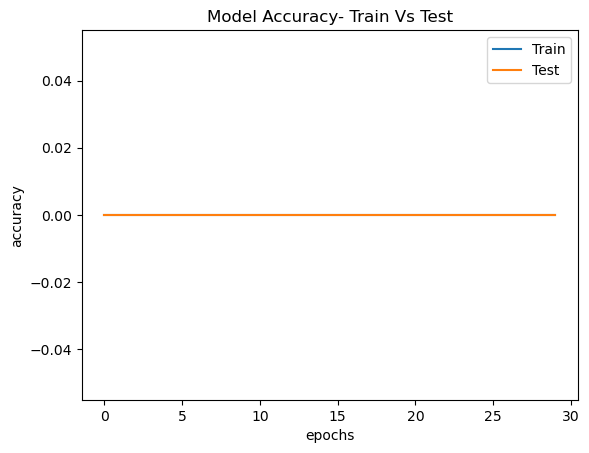

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
print(result.history.keys())
plt.plot(result.history['accuracy'])
plt.plot(result.history['val_accuracy'])
plt.title('Model Accuracy- Train Vs Test')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['Train','Test'])
plt.show()



dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


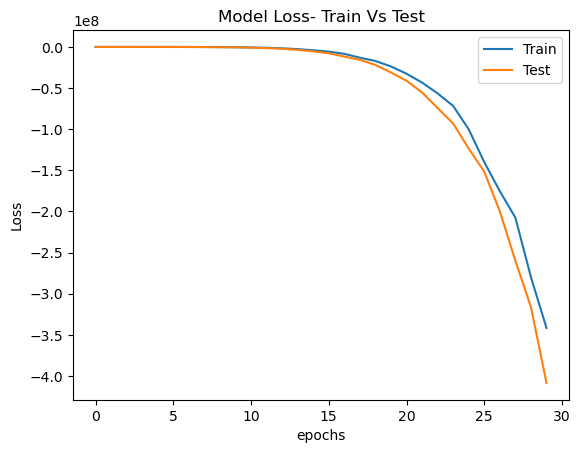

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline
print(result.history.keys())
plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])
plt.title('Model Loss- Train Vs Test')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.legend(['Train','Test'])
plt.show()


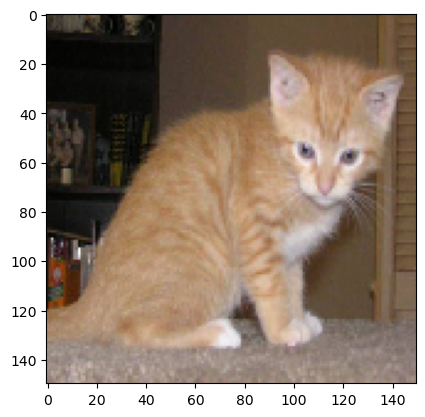

In [29]:
from keras.preprocessing.image import load_img
import matplotlib.pyplot as plt

# Load the image
img = load_img('C:\\Users\\my pc\\DL_with_python\\cat.4003.jpg', target_size=(150, 150))

# Display the image
plt.imshow(img)
plt.show()
